In [5]:
#初始化
import pandas as pd
import matplotlib.pyplot as plt

#字体
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  
df = pd.read_csv('ddf-data.csv')

In [6]:
df['trx_datetime_c1'] = pd.to_datetime(df['trx_datime_c1'], errors='coerce')
df['trx_datetime_c2'] = pd.to_datetime(df['trx_datime_c2'], errors='coerce')
date_filter = pd.to_datetime('2015-10-20').date()
df_c1 = df[df['trx_datetime_c1'].dt.date == date_filter].copy()
df_c1['hour'] = df_c1['trx_datetime_c1'].dt.hour
df_c2 = df[df['trx_datetime_c2'].dt.date == date_filter].copy()
df_c2['hour'] = df_c2['trx_datetime_c2'].dt.hour
df_c1_hour = df_c1[['hour']].copy()
df_c2_hour = df_c2[['hour']].copy()
df_hours = pd.concat([df_c1_hour, df_c2_hour], ignore_index=True)
hour_counts = df_hours['hour'].value_counts().sort_index()
all_hours = pd.Series(range(24), name='hour')
hour_counts = hour_counts.reindex(all_hours).fillna(0).astype(int)


plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
plt.bar(hour_counts.index, hour_counts.values, width=0.8, align='center', color='skyblue', edgecolor='black')
plt.title('2015-10-20 每小时交易次数直方图', fontsize=16)
plt.xlabel('小时', fontsize=14)
plt.ylabel('交易次数', fontsize=14)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [7]:

df['trx_datetime_c1'] = pd.to_datetime(df['trx_datime_c1'], errors='coerce')
df['trx_datetime_c2'] = pd.to_datetime(df['trx_datime_c2'], errors='coerce')
date_filter = pd.to_datetime('2015-10-20').date()
# 第一次交易
df_c1 = df[df['trx_datetime_c1'].dt.date == date_filter].copy()
# 第二次交易
df_c2 = df[df['trx_datetime_c2'].dt.date == date_filter].copy()
df_c1_times = df_c1[['trx_datetime_c1']].copy()
df_c1_times.rename(columns={'trx_datetime_c1': 'transaction_time'}, inplace=True)
df_c2_times = df_c2[['trx_datetime_c2']].copy()
df_c2_times.rename(columns={'trx_datetime_c2': 'transaction_time'}, inplace=True)
df_times = pd.concat([df_c1_times, df_c2_times], ignore_index=True)
df_times.dropna(subset=['transaction_time'], inplace=True)
df_times.sort_values(by='transaction_time', inplace=True)
df_times.reset_index(drop=True, inplace=True)
df_times['cumulative_count'] = range(1, len(df_times) + 1)
df_times['hour'] = df_times['transaction_time'].dt.hour
df_times['transaction_count'] = 1
hourly_counts = df_times.groupby('hour')['transaction_count'].count().reindex(range(0,24), fill_value=0)
cumulative_counts = hourly_counts.cumsum()
hours = pd.DataFrame({'hour': range(0, 24)})
hours['cumulative_count'] = cumulative_counts.values
hours['cumulative_count'].fillna(method='ffill', inplace=True)
hours['cumulative_count'].fillna(0, inplace=True)

# 绘制折线图
plt.figure(figsize=(12, 6))
plt.plot(hours['hour'], hours['cumulative_count'], marker='o', linestyle='-', color='blue')
plt.title('2015-10-20 每小时累积交易次数折线图', fontsize=16)
plt.xlabel('小时', fontsize=14)
plt.ylabel('累积交易次数', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_5940\779925435.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hours['cumulative_count'].fillna(method='ffill', inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_5940\779925435.py:49: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hours['cumulative_count'].fillna(method='ffill', inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_5940\779925435.py:50: FutureWarning: A value is tryi

C:\Users\dell\AppData\Local\Temp\ipykernel_5940\1341897409.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_counts['counts'].fillna(0, inplace=True)


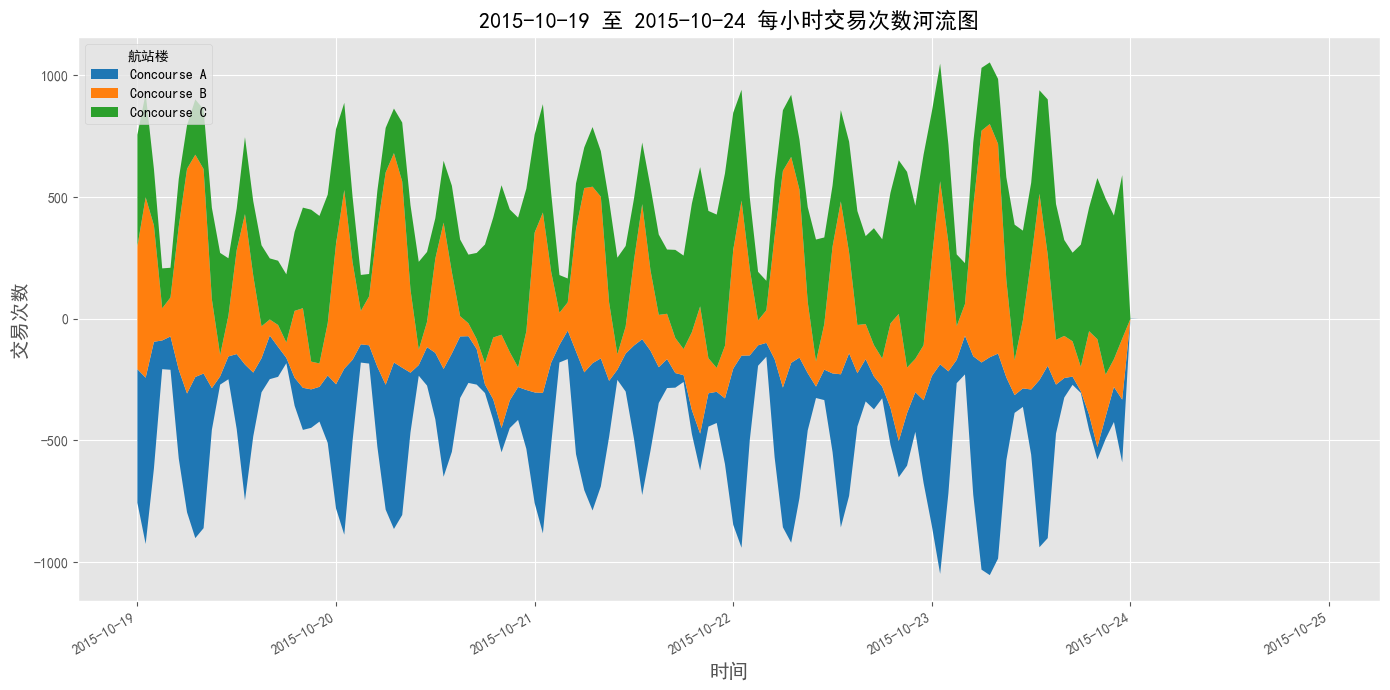

In [8]:
# 将交易时间转换为 datetime 格式
df['trx_datetime_c1'] = pd.to_datetime(df['trx_datime_c1'], errors='coerce')
df['trx_datetime_c2'] = pd.to_datetime(df['trx_datime_c2'], errors='coerce')

start_date = pd.to_datetime('2015-10-19')
end_date = pd.to_datetime('2015-10-24')
df_c1 = df[(df['trx_datetime_c1'] >= start_date) & (df['trx_datetime_c1'] <= end_date)].copy()
df_c2 = df[(df['trx_datetime_c2'] >= start_date) & (df['trx_datetime_c2'] <= end_date)].copy()
df_c1_transactions = df_c1[['concourse_c1', 'trx_datetime_c1']].copy()
df_c1_transactions.rename(columns={'concourse_c1': 'concourse', 'trx_datetime_c1': 'transaction_time'}, inplace=True)

df_c2_transactions = df_c2[['concourse_c2', 'trx_datetime_c2']].copy()
df_c2_transactions.rename(columns={'concourse_c2': 'concourse', 'trx_datetime_c2': 'transaction_time'}, inplace=True)

df_transactions = pd.concat([df_c1_transactions, df_c2_transactions], ignore_index=True)
df_transactions.dropna(subset=['transaction_time', 'concourse'], inplace=True)

df_transactions['date'] = df_transactions['transaction_time'].dt.normalize()
df_transactions['hour'] = df_transactions['transaction_time'].dt.hour

transaction_counts = df_transactions.groupby(['date', 'hour', 'concourse']).size().reset_index(name='counts')
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

hour_range = range(0, 24)
concourse_list = df_transactions['concourse'].unique()
full_index = pd.MultiIndex.from_product(
    [date_range, hour_range, concourse_list], names=['date', 'hour', 'concourse']
)

full_counts = pd.DataFrame(index=full_index).reset_index()
full_counts = pd.merge(full_counts, transaction_counts, on=['date', 'hour', 'concourse'], how='left')
full_counts['counts'].fillna(0, inplace=True)
full_counts['datetime'] = full_counts['date'] + pd.to_timedelta(full_counts['hour'], unit='h')
pivot_data = full_counts.pivot_table(index='datetime', columns='concourse', values='counts', fill_value=0)
times = pivot_data.index
terminal_names = pivot_data.columns
data_values = [pivot_data[terminal] for terminal in terminal_names]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 示例颜色
plt.figure(figsize=(14, 7))
plt.stackplot(times, data_values, labels=terminal_names, colors=colors, baseline='sym')
plt.title('2015-10-19 至 2015-10-24 每小时交易次数河流图', fontsize=16)
plt.xlabel('时间', fontsize=14)
plt.ylabel('交易次数', fontsize=14)
plt.gcf().autofmt_xdate()
plt.legend(title='航站楼', loc='upper left')
plt.tight_layout()
plt.show()
